### 1. Persiapan Awal (Setup)
Langkah pertama adalah mengimpor modul-modul umum yang diperlukan, memastikan grafik Matplotlib ditampilkan langsung (inline), dan menyiapkan fungsi untuk menyimpan gambar. Kita juga akan memeriksa apakah Python versi 3.5 atau yang lebih baru sudah terinstal (meskipun Python 2.x mungkin berfungsi, disarankan untuk menggunakan Python 3), serta Scikit-Learn versi 0.20 atau yang lebih baru.

In [25]:
# Python ≥3.5 diperlukan
import sys
assert sys.version_info >= (3, 5)

# Scikit-Learn ≥0.20 diperlukan
import sklearn
assert sklearn.__version__ >= "0.20"

# Import modul umum
import numpy as np
import os
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

# Untuk membuat output notebook ini stabil di setiap eksekusi
np.random.seed(42)

# Untuk menggambar grafik yang bagus
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

# Setup untuk menyimpan gambar
PROJECT_ROOT_DIR = "."
CHAPTER_ID = "decision_trees"
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID)
os.makedirs(IMAGES_PATH, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    print("Menyimpan gambar", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

print("Setup selesai!")
print(f"Python version: {sys.version}")
print(f"Scikit-Learn version: {sklearn.__version__}")

Setup selesai!
Python version: 3.12.2 | packaged by conda-forge | (main, Feb 16 2024, 20:50:58) [GCC 12.3.0]
Scikit-Learn version: 1.6.1


### 2. Melatih dan Memvisualisasikan Decision Tree


=== Dataset Iris ===
Fitur: ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
Target: ['setosa' 'versicolor' 'virginica']
Jumlah sampel: 150
Jumlah fitur: 4

Menggunakan fitur: ['petal length (cm)', 'petal width (cm)']
Shape X: (150, 2)
Shape y: (150,)

Model telah dilatih!
Akurasi training: 0.960


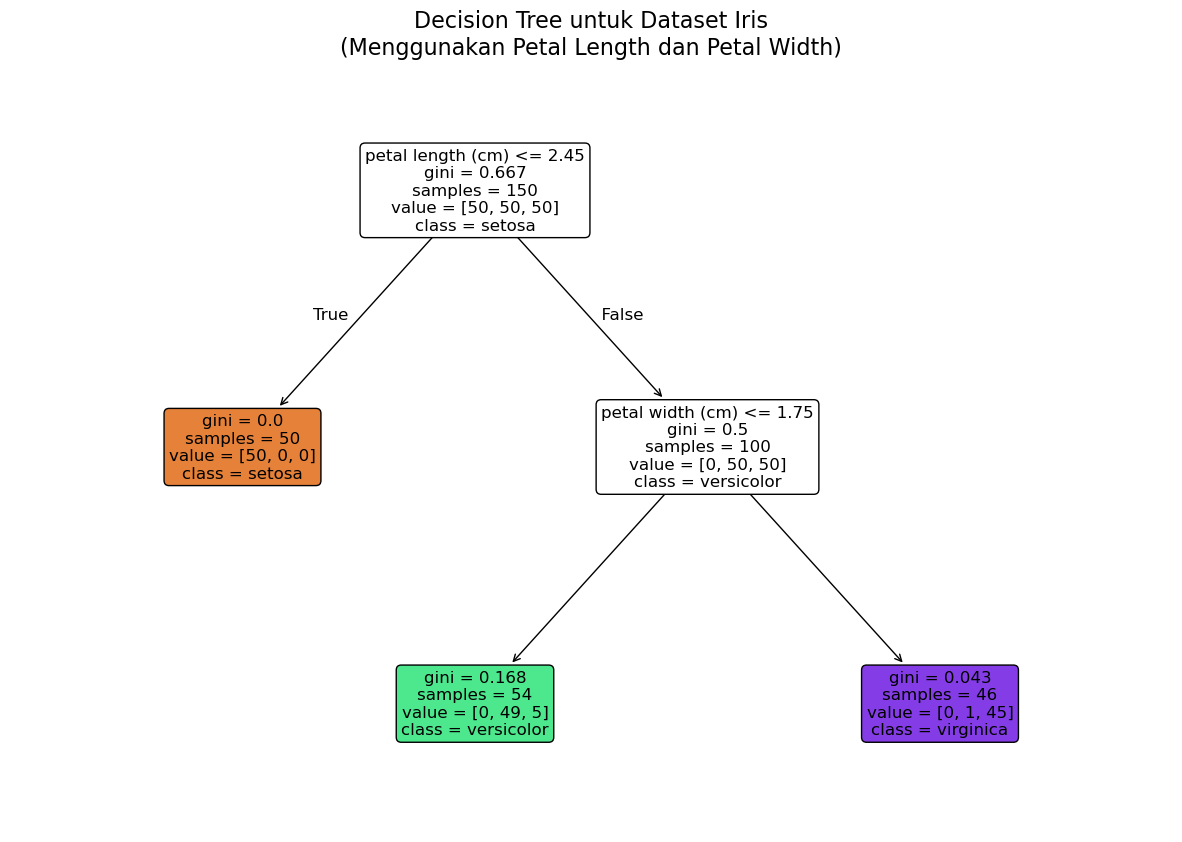


=== Aturan Decision Tree ===
|--- petal length (cm) <= 2.45
|   |--- class: 0
|--- petal length (cm) >  2.45
|   |--- petal width (cm) <= 1.75
|   |   |--- class: 1
|   |--- petal width (cm) >  1.75
|   |   |--- class: 2



In [26]:
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier, plot_tree, export_text

# Memuat dataset Iris
iris = load_iris()
print("\n=== Dataset Iris ===")
print(f"Fitur: {iris.feature_names}")
print(f"Target: {iris.target_names}")
print(f"Jumlah sampel: {iris.data.shape[0]}")
print(f"Jumlah fitur: {iris.data.shape[1]}")

# Menggunakan panjang dan lebar kelopak bunga (petal length and width) sebagai fitur
X = iris.data[:, 2:]  # Petal length dan petal width
y = iris.target

print(f"\nMenggunakan fitur: {iris.feature_names[2:4]}")
print(f"Shape X: {X.shape}")
print(f"Shape y: {y.shape}")

# Membuat objek DecisionTreeClassifier dengan kedalaman maksimum 2
tree_clf = DecisionTreeClassifier(max_depth=2, random_state=42)
tree_clf.fit(X, y)

print(f"\nModel telah dilatih!")
print(f"Akurasi training: {tree_clf.score(X, y):.3f}")

# Visualisasi Decision Tree
plt.figure(figsize=(15, 10))
plot_tree(tree_clf, 
          feature_names=iris.feature_names[2:4],
          class_names=iris.target_names,
          filled=True,
          rounded=True,
          fontsize=12)
plt.title("Decision Tree untuk Dataset Iris\n(Menggunakan Petal Length dan Petal Width)", fontsize=16)
plt.show()

# Menampilkan aturan dalam bentuk teks
print("\n=== Aturan Decision Tree ===")
tree_rules = export_text(tree_clf, 
                        feature_names=iris.feature_names[2:4])
print(tree_rules)

### 3. Membuat Prediksi

In [27]:
# Memprediksi probabilitas untuk instance dengan panjang kelopak 5 cm dan lebar 1.5 cm
sample_input = [[5, 1.5]]
proba = tree_clf.predict_proba(sample_input)
prediction = tree_clf.predict(sample_input)

print(f"\n=== Prediksi untuk Input [5, 1.5] ===")
print(f"Probabilitas untuk setiap kelas:")
for i, class_name in enumerate(iris.target_names):
    print(f"  {class_name}: {proba[0][i]:.3f}")
print(f"Prediksi kelas: {iris.target_names[prediction[0]]}")


=== Prediksi untuk Input [5, 1.5] ===
Probabilitas untuk setiap kelas:
  setosa: 0.000
  versicolor: 0.907
  virginica: 0.093
Prediksi kelas: versicolor


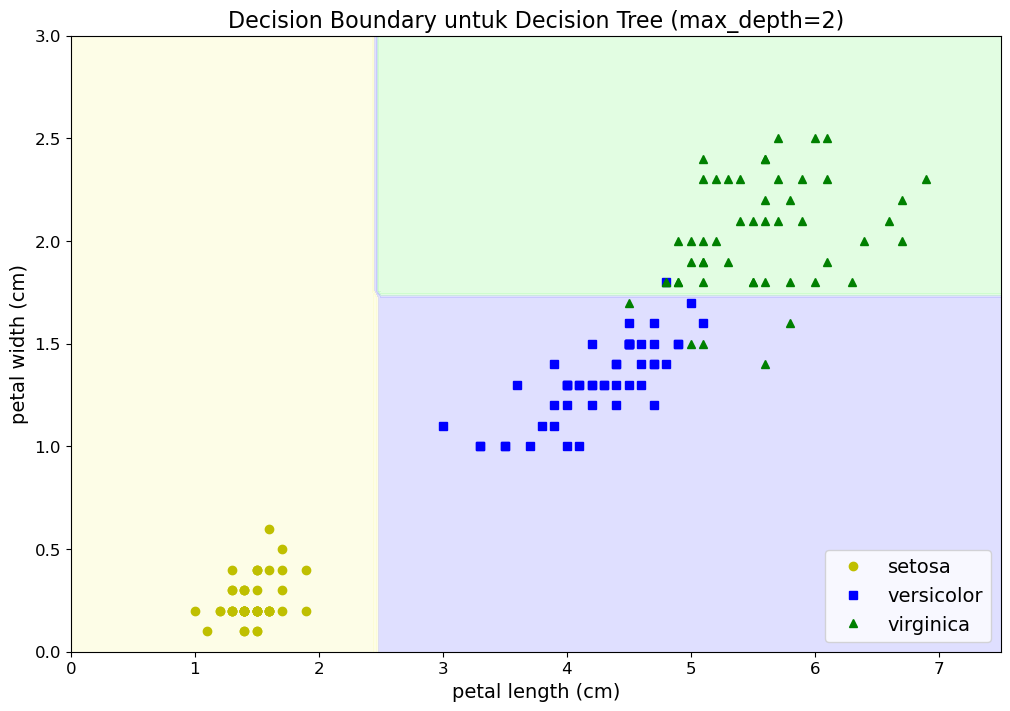

In [28]:
# Visualisasi decision boundary
def plot_decision_boundary(clf, X, y, axes=[0, 7.5, 0, 3], iris=None, legend=False, plot_training=True):
    x1s = np.linspace(axes[0], axes[1], 100)
    x2s = np.linspace(axes[2], axes[3], 100)
    x1, x2 = np.meshgrid(x1s, x2s)
    X_new = np.c_[x1.ravel(), x2.ravel()]
    y_pred = clf.predict(X_new).reshape(x1.shape)
    
    # Pilih colormap berdasarkan jumlah kelas
    n_classes = len(np.unique(y))
    if n_classes == 2:
        custom_cmap = ListedColormap(['#fafab0','#9898ff'])
        custom_cmap2 = ListedColormap(['#7d7d58','#4c4c7f'])
    else:
        custom_cmap = ListedColormap(['#fafab0','#9898ff','#a0faa0'])
        custom_cmap2 = ListedColormap(['#7d7d58','#4c4c7f','#507d50'])
    
    plt.contourf(x1, x2, y_pred, alpha=0.3, cmap=custom_cmap)
    
    if iris is None:
        plt.contour(x1, x2, y_pred, cmap=custom_cmap2, alpha=0.8)
    
    if plot_training:
        if iris is not None:
            # Untuk dataset Iris (3 kelas)
            plt.plot(X[:, 0][y==0], X[:, 1][y==0], "yo", label=iris.target_names[0])
            plt.plot(X[:, 0][y==1], X[:, 1][y==1], "bs", label=iris.target_names[1])
            plt.plot(X[:, 0][y==2], X[:, 1][y==2], "g^", label=iris.target_names[2])
        else:
            # Untuk dataset lain (2 kelas)
            plt.plot(X[:, 0][y==0], X[:, 1][y==0], "yo", label="Kelas 0")
            plt.plot(X[:, 0][y==1], X[:, 1][y==1], "bs", label="Kelas 1")
        plt.axis(axes)
    
    if iris is not None:
        plt.xlabel(iris.feature_names[2], fontsize=14)
        plt.ylabel(iris.feature_names[3], fontsize=14)
    else:
        plt.xlabel(r"$x_1$", fontsize=14)
        plt.ylabel(r"$x_2$", fontsize=14)
    
    if legend:
        plt.legend(loc="lower right", fontsize=14)

plt.figure(figsize=(12, 8))
plot_decision_boundary(tree_clf, X, y, iris=iris, legend=True)
plt.title("Decision Boundary untuk Decision Tree (max_depth=2)", fontsize=16)
plt.show()


### 4. Estimating Class Probabilities

#### Hyperparameter Regularization
Decision Tree sangat sensitif terhadap perubahan kecil pada dataset (misalnya, rotasi). Mari kita tunjukkan bahwa melatih model yang sama pada data yang sama dapat menghasilkan model yang sangat berbeda setiap saat, karena algoritma pelatihan CART yang digunakan oleh Scikit-Learn adalah stokastik. Untuk menunjukkan ini, kita akan mengatur random_state ke nilai yang berbeda dari sebelumnya:

In [29]:
# Melatih Decision Tree dengan random_state yang berbeda
tree_clf_tweaked = DecisionTreeClassifier(max_depth=2, random_state=40)
tree_clf_tweaked.fit(X, y)

DecisionTreeClassifier(max_depth=2, random_state=40)

##### Kode berikut menunjukkan efek min_samples_leaf sebagai regularisasi.

Model 1 (random_state=42): [0.         0.90740741 0.09259259]
Model 2 (random_state=40): [0.         0.90740741 0.09259259]
Akurasi Model 1: 0.960
Akurasi Model 2: 0.960

=== Demonstrasi Regularisasi (Dataset Moons) ===
Tree tanpa regularisasi - Akurasi: 1.000
Tree dengan min_samples_leaf=4 - Akurasi: 0.960


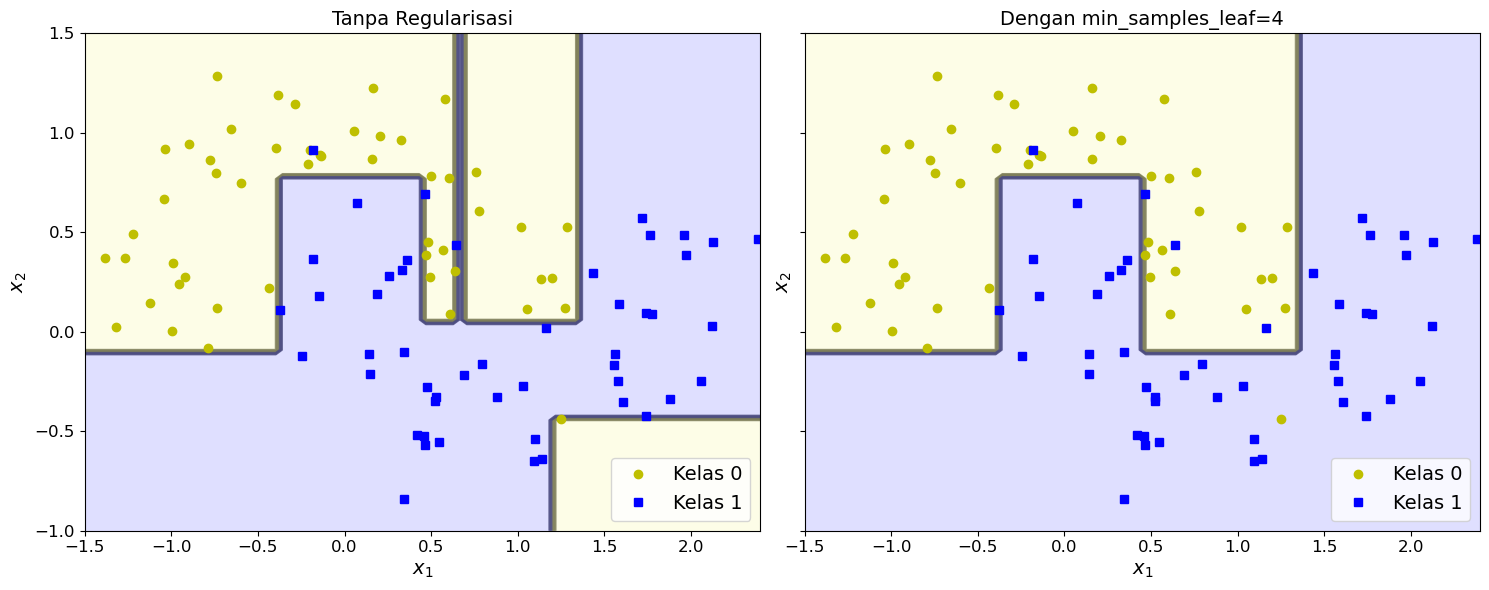

In [30]:
# Bandingkan prediksi
sample_input = [[5, 1.5]]
proba1 = tree_clf.predict_proba(sample_input)
proba2 = tree_clf_tweaked.predict_proba(sample_input)

print(f"Model 1 (random_state=42): {proba1[0]}")
print(f"Model 2 (random_state=40): {proba2[0]}")
print(f"Akurasi Model 1: {tree_clf.score(X, y):.3f}")
print(f"Akurasi Model 2: {tree_clf_tweaked.score(X, y):.3f}")

# Demonstrasi regularisasi dengan dataset moons
from sklearn.datasets import make_moons

print("\n=== Demonstrasi Regularisasi (Dataset Moons) ===")

# Membuat dataset 'moons' sintetis
Xm, ym = make_moons(n_samples=100, noise=0.25, random_state=53)

# Melatih dua Decision Tree: satu tanpa batasan, satu dengan min_samples_leaf=4
deep_tree_clf1 = DecisionTreeClassifier(random_state=42)
deep_tree_clf2 = DecisionTreeClassifier(min_samples_leaf=4, random_state=42)
deep_tree_clf1.fit(Xm, ym)
deep_tree_clf2.fit(Xm, ym)

print(f"Tree tanpa regularisasi - Akurasi: {deep_tree_clf1.score(Xm, ym):.3f}")
print(f"Tree dengan min_samples_leaf=4 - Akurasi: {deep_tree_clf2.score(Xm, ym):.3f}")

# Visualisasi perbandingan regularisasi
fig, axes = plt.subplots(ncols=2, figsize=(15, 6), sharey=True)

plt.sca(axes[0])
plot_decision_boundary(deep_tree_clf1, Xm, ym, axes=[-1.5, 2.4, -1, 1.5], iris=None, legend=True)
plt.title("Tanpa Regularisasi", fontsize=14)

plt.sca(axes[1])
plot_decision_boundary(deep_tree_clf2, Xm, ym, axes=[-1.5, 2.4, -1, 1.5], iris=None, legend=True)
plt.title("Dengan min_samples_leaf=4", fontsize=14)

plt.tight_layout()
plt.show()

##### Kode berikut menunjukkan sensitivitas terhadap rotasi data.

Akurasi pada data asli: 0.960
Akurasi pada data dirotasi: 0.980


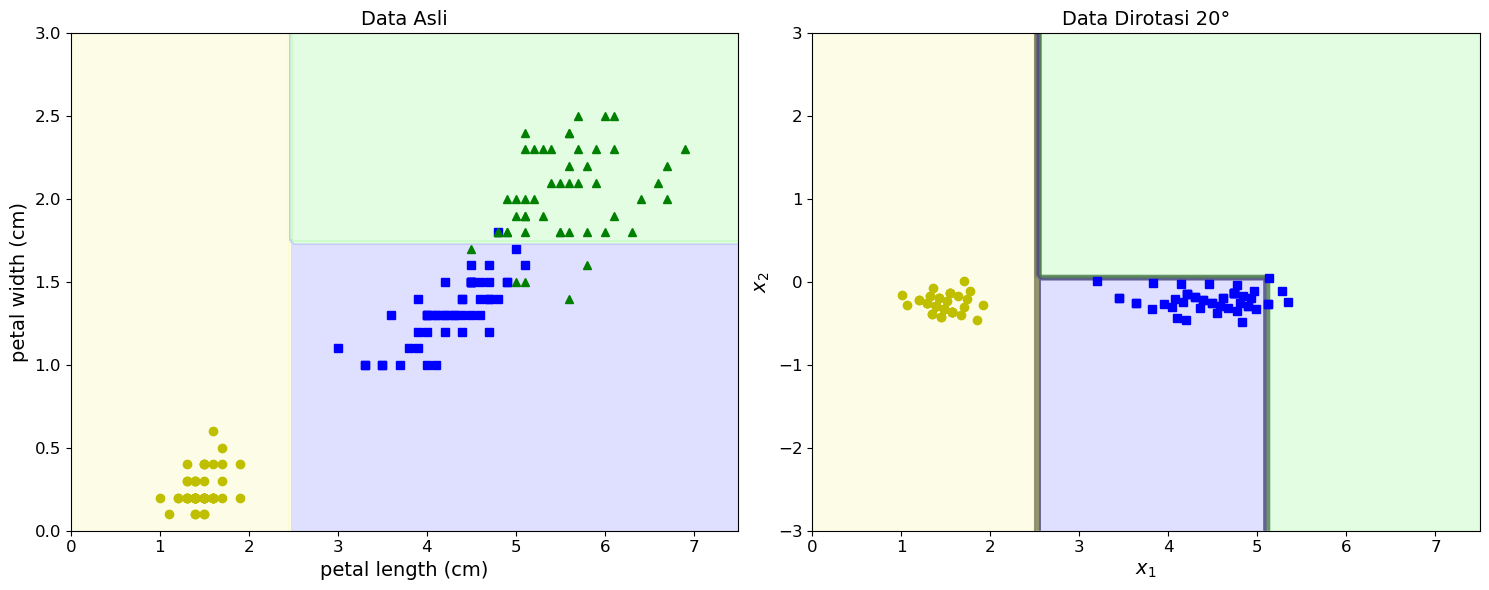

In [31]:
# Memutar dataset Iris
angle = np.pi / 180 * 20
rotation_matrix = np.array([[np.cos(angle), -np.sin(angle)], [np.sin(angle), np.cos(angle)]])
Xr = X.dot(rotation_matrix)

# Melatih Decision Tree pada dataset yang diputar
tree_clf_r = DecisionTreeClassifier(random_state=42, max_depth=3)
tree_clf_r.fit(Xr, y)

print(f"Akurasi pada data asli: {tree_clf.score(X, y):.3f}")
print(f"Akurasi pada data dirotasi: {tree_clf_r.score(Xr, y):.3f}")

# Visualisasi perbandingan
fig, axes = plt.subplots(ncols=2, figsize=(15, 6))

plt.sca(axes[0])
plot_decision_boundary(tree_clf, X, y, iris=iris)
plt.title("Data Asli", fontsize=14)

plt.sca(axes[1])
plot_decision_boundary(tree_clf_r, Xr, y, axes=[0, 7.5, -3, 3])
plt.title("Data Dirotasi 20°", fontsize=14)

plt.tight_layout()
plt.show()

### 5. Regresi (Regression)
Siapkan dataset linear sederhana:

In [32]:
# Dataset pelatihan kuadrat + noise
np.random.seed(42)
m = 200
X_reg = np.random.rand(m, 1)  # Fitur tunggal
y_reg = 4 * (X_reg - 0.5) ** 2  # Output kuadratik
y_reg = y_reg + np.random.randn(m, 1) / 10  # Menambahkan noise

print(f"Dataset regresi - Sampel: {m}, Fitur: 1")
print(f"X range: [{X_reg.min():.2f}, {X_reg.max():.2f}]")
print(f"y range: [{y_reg.min():.2f}, {y_reg.max():.2f}]")

Dataset regresi - Sampel: 200, Fitur: 1
X range: [0.01, 0.99]
y range: [-0.15, 1.14]


##### Berikut adalah kode untuk melatih dua Decision Tree Regressor dengan kedalaman yang berbeda.

R² score (max_depth=2): 0.797
R² score (max_depth=2): 0.797
R² score (max_depth=3): 0.887


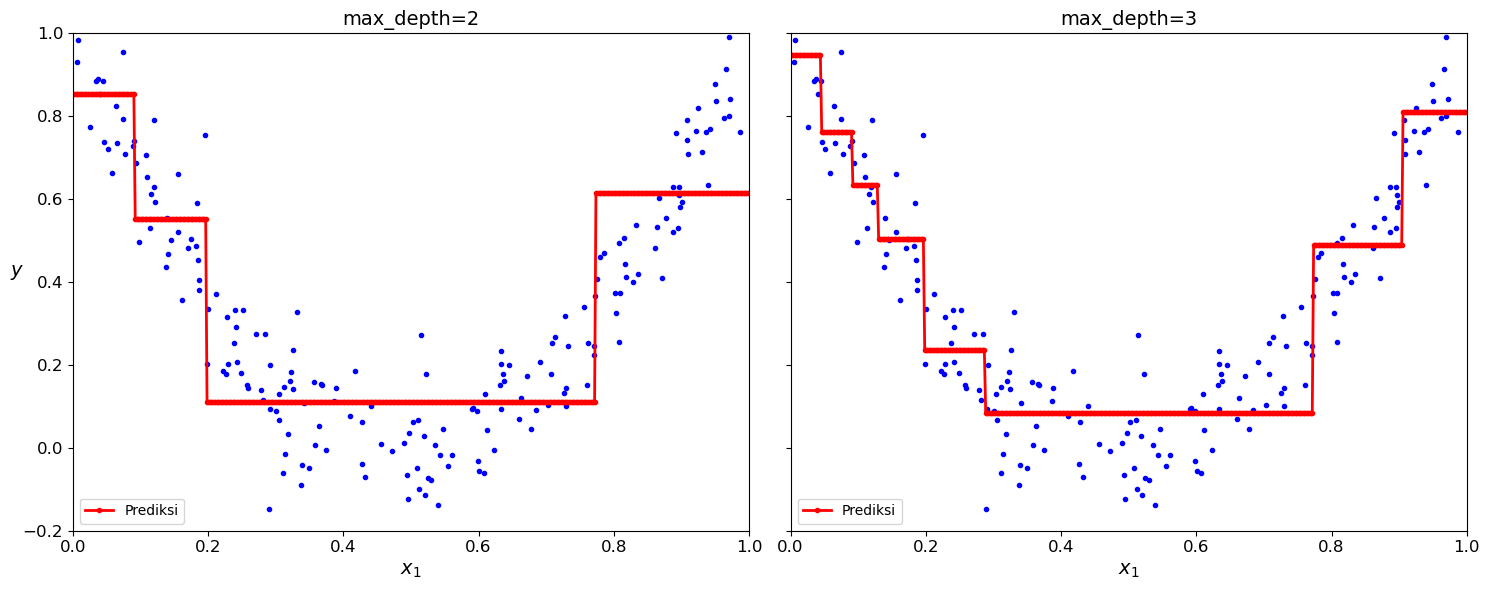

In [33]:
from sklearn.tree import DecisionTreeRegressor

# Membuat objek DecisionTreeRegressor dengan kedalaman maksimum 2
tree_reg = DecisionTreeRegressor(max_depth=2, random_state=42)
tree_reg.fit(X_reg, y_reg)

print(f"R² score (max_depth=2): {tree_reg.score(X_reg, y_reg):.3f}")

# Melatih dua Decision Tree Regressor dengan kedalaman yang berbeda
tree_reg1 = DecisionTreeRegressor(random_state=42, max_depth=2)
tree_reg2 = DecisionTreeRegressor(random_state=42, max_depth=3)
tree_reg1.fit(X_reg, y_reg)
tree_reg2.fit(X_reg, y_reg)

print(f"R² score (max_depth=2): {tree_reg1.score(X_reg, y_reg):.3f}")
print(f"R² score (max_depth=3): {tree_reg2.score(X_reg, y_reg):.3f}")

# Visualisasi regresi
def plot_regression_predictions(tree_reg, X, y, axes=[0, 1, -0.2, 1], ylabel="$y$"):
    x1 = np.linspace(axes[0], axes[1], 500).reshape(-1, 1)
    y_pred = tree_reg.predict(x1)
    plt.axis(axes)
    plt.xlabel("$x_1$", fontsize=14)
    if ylabel:
        plt.ylabel(ylabel, fontsize=14, rotation=0)
    plt.plot(X, y, "b.")
    plt.plot(x1, y_pred, "r.-", linewidth=2, label="Prediksi")

fig, axes = plt.subplots(ncols=2, figsize=(15, 6), sharey=True)

plt.sca(axes[0])
plot_regression_predictions(tree_reg1, X_reg, y_reg)
plt.title("max_depth=2", fontsize=14)
plt.legend()

plt.sca(axes[1])
plot_regression_predictions(tree_reg2, X_reg, y_reg, ylabel=None)
plt.title("max_depth=3", fontsize=14)
plt.legend()

plt.tight_layout()
plt.show()

##### Berikut adalah kode untuk meregulasi Decision Tree regressor.


=== Regularisasi untuk Decision Tree Regressor ===
R² score tanpa regularisasi: 1.000
R² score dengan min_samples_leaf=10: 0.921


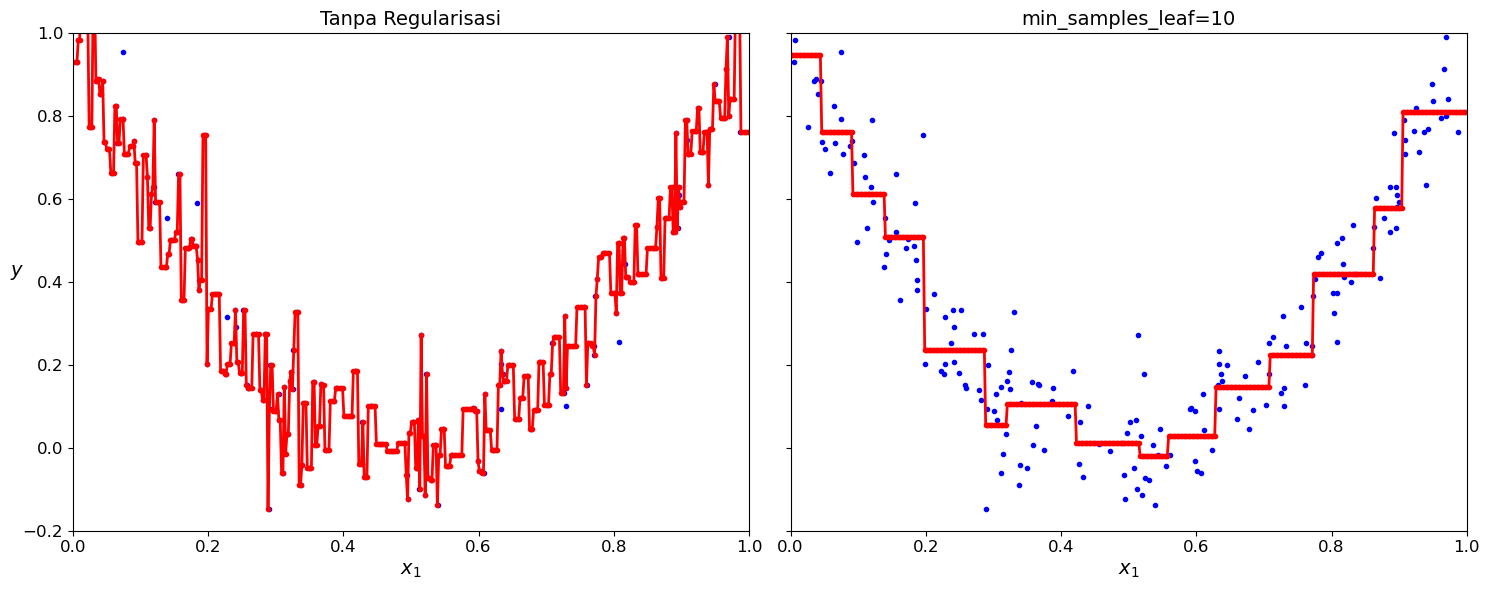

In [34]:
# Regularisasi untuk regresi
print("\n=== Regularisasi untuk Decision Tree Regressor ===")

tree_reg_unreg = DecisionTreeRegressor(random_state=42)
tree_reg_reg = DecisionTreeRegressor(random_state=42, min_samples_leaf=10)
tree_reg_unreg.fit(X_reg, y_reg)
tree_reg_reg.fit(X_reg, y_reg)

print(f"R² score tanpa regularisasi: {tree_reg_unreg.score(X_reg, y_reg):.3f}")
print(f"R² score dengan min_samples_leaf=10: {tree_reg_reg.score(X_reg, y_reg):.3f}")

fig, axes = plt.subplots(ncols=2, figsize=(15, 6), sharey=True)

plt.sca(axes[0])
plot_regression_predictions(tree_reg_unreg, X_reg, y_reg)
plt.title("Tanpa Regularisasi", fontsize=14)

plt.sca(axes[1])
plot_regression_predictions(tree_reg_reg, X_reg, y_reg, ylabel=None)
plt.title("min_samples_leaf=10", fontsize=14)

plt.tight_layout()
plt.show()

##### Analisis Feature Importance

Feature Importance:
  sepal length (cm): 0.000
  sepal width (cm): 0.000
  petal length (cm): 0.586
  petal width (cm): 0.414


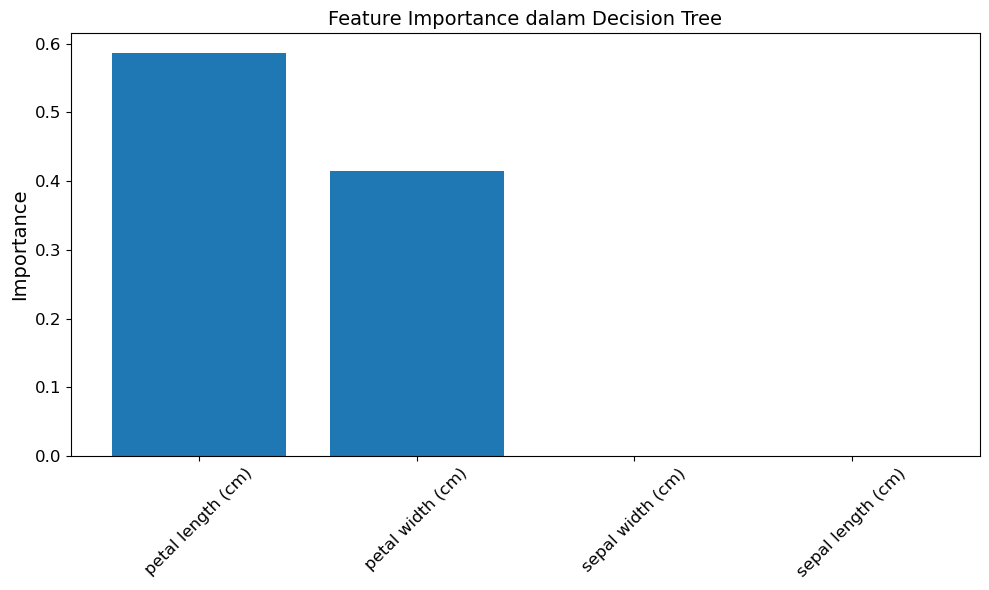


Akurasi dengan semua fitur: 0.973


In [36]:
# Menggunakan semua fitur Iris untuk analisis feature importance
X_all = iris.data
tree_clf_all = DecisionTreeClassifier(max_depth=3, random_state=42)
tree_clf_all.fit(X_all, y)

feature_importance = tree_clf_all.feature_importances_
print("Feature Importance:")
for i, importance in enumerate(feature_importance):
    print(f"  {iris.feature_names[i]}: {importance:.3f}")

# Visualisasi feature importance
plt.figure(figsize=(10, 6))
indices = np.argsort(feature_importance)[::-1]
plt.bar(range(len(feature_importance)), feature_importance[indices])
plt.xticks(range(len(feature_importance)), [iris.feature_names[i] for i in indices], rotation=45)
plt.title("Feature Importance dalam Decision Tree", fontsize=14)
plt.ylabel("Importance", fontsize=14)
plt.tight_layout()
plt.show()

print(f"\nAkurasi dengan semua fitur: {tree_clf_all.score(X_all, y):.3f}")

---

# Penjelasan

---

##  1. Persiapan Awal (Setup)
- Memastikan **Python ≥3.5** dan **Scikit-Learn ≥0.20** sudah terinstal.
- Mengimpor modul yang diperlukan: `numpy`, `matplotlib`, dan `sklearn.tree`.
- Menetapkan `random_state=42` untuk **reproduktivitas hasil eksperimen**.

---

##  2. Melatih dan Memvisualisasikan Decision Tree (Klasifikasi Iris Dataset)

### **Dataset Iris**
- **Jumlah sampel:** **150**.
- **Fitur:** **Sepal length, sepal width, petal length, petal width**.
- **Kelas target:** **Setosa, Versicolor, Virginica**.

### **Fitur yang Digunakan**
- Hanya **petal length (cm)** dan **petal width (cm)** digunakan.
- **Bentuk data input (X):** `(150, 2)`, **target (y):** `(150,)`.

### **Model dan Akurasi**
- **DecisionTreeClassifier** dilatih dengan `max_depth=2`.
- **Akurasi pada data training:** **0.960**.

### **Aturan Decision Tree**
- **Petal length ≤ 2.45 cm** → **Kelas: Setosa (0)**.
- **Petal length > 2.45 cm** → Cek **Petal width**:
  - **≤ 1.75 cm** → **Kelas: Versicolor (1)**.
  - **> 1.75 cm** → **Kelas: Virginica (2)**.

---

##  3. Membuat Prediksi
- **Input:** `petal length = 5 cm`, `petal width = 1.5 cm`
- **Probabilitas prediksi**:
  - **Setosa:** `0.000`
  - **Versicolor:** `0.907`
  - **Virginica:** `0.093`
- **Prediksi akhir:** **Versicolor**, karena memiliki probabilitas tertinggi.

---

##  4. Estimating Class Probabilities & Hyperparameter Regularization

### **Visualisasi Decision Boundary**
- **Garis-garis lurus** membagi ruang fitur menjadi wilayah berdasarkan kelas yang diprediksi.

### **Sensitivitas terhadap `random_state`**
- Dua Decision Trees dilatih (`random_state=42` vs. `random_state=40`).
- **Hasil tidak berubah (akurasi tetap 0.960)**, tetapi secara teori **algoritma CART bersifat stokastik**.

### **Regularisasi dengan Dataset Moons**
- **Tanpa regularisasi** (`min_samples_leaf=1`): **Akurasi = 1.000** → **Overfitting**.
- **Dengan regularisasi** (`min_samples_leaf=4`): **Akurasi = 0.960** → **Model lebih mampu generalisasi**.

### **Sensitivitas terhadap Rotasi Data**
- **Dataset diputar 20 derajat**.
- **Akurasi sebelum rotasi:** **0.960**, **setelah rotasi:** **0.980**.
- **Decision Tree sangat sensitif terhadap orientasi data**, karena **membuat batas keputusan tegak lurus terhadap sumbu fitur**.

---

##  5. Regresi (Regression)

### **Dataset Regresi**
- **200 sampel, 1 fitur, output kuadratik dengan noise**.
- **Rentang X:** `[0.01, 0.99]`, **Rentang Y:** `[-0.15, 1.14]`.

### **Melatih Decision Tree Regressor**
- **max_depth=2** → **Skor R²: 0.797**.
- **max_depth=3** → **Skor R²: 0.887** (pola lebih kompleks ditangkap).

### **Regularisasi untuk Decision Tree Regressor**
- **Tanpa regularisasi:** **Skor R² = 1.000** → **Overfitting sempurna**.
- **Dengan `min_samples_leaf=10`:** **Skor R² = 0.921**, **prediksi lebih halus & robust**.

---

##  6. Analisis Feature Importance

### **Pentingnya Fitur Iris**
- **Menggunakan keempat fitur dengan `max_depth=3`**, akurasi meningkat menjadi **0.973**.

### **Prioritas Fitur**
| Fitur             | Importance |
|------------------|------------|
| **Petal length** | **0.586** |
| **Petal width**  | **0.414** |
| **Sepal length** | **0.000** |
| **Sepal width**  | **0.000** |

### **Kesimpulan**
- **Petal length dan petal width adalah fitur terpenting**.
- **Sepal length dan sepal width tidak berkontribusi** dalam model (dengan kedalaman terbatas).

---

##  Kesimpulan Umum

✔ **Decision Trees mudah diinterpretasikan**, dapat divisualisasikan dalam bentuk pohon atau teks.  
✔ **Sangat sensitif terhadap perubahan kecil** (rotasi, `random_state`), **cenderung overfit** tanpa regulasi.  
✔ **Regularisasi penting** untuk **mengurangi kompleksitas model** dan **meningkatkan generalisasi**.  
✔ **Decision Trees secara otomatis memberikan importance fitur**, membantu memilih fitur yang paling relevan.